# Python - Making a map


**Aim:** To create a map of data from reanalysis heat fluxes.

**Data:** You will need to download files from [ICDC](https://www.cen.uni-hamburg.de/en/icdc/data/atmosphere/reanalysis-atmosphere/ncep.html).  We will be using NCEP Reanalysis heat fluxes at the ocean surface, and you will need one snapshot of sensible heat flux, latex heat flux, net shortwave and net longwave radiation flux.  

**Directions:** Create an `*.ipynb` and 3 figures: once using Matplotlib, once using cartopy and once using pyGMT.

<hr>

## Create a notebook & load the data

1. Create an `*.ipynb` containing the commands for this assignment, or copy this file and rename it, e.g., `computing-regoz-4-<Lastname>.ipynb`  

2. Import necessary packages.


    For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need
    ```{python}
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import xarray as xr
    from datetime import datetime
    ```
    If you are missing any of these packages, please refer to [Resources: Python](../resource/python).

3. Download some data.  First decide what year you'd like to work with; anything from 1948 to 2023 is fine.  Then navigate to each of the 4 components of surface heat fluxes on the ICDC page [https://icdc.cen.uni-hamburg.de/thredds-int/catalog/dataicdc/reanalyses/ncep_reanalysis1/DATA/sensible_heat_flux/catalog.html](https://icdc.cen.uni-hamburg.de/thredds-int/catalog/dataicdc/reanalyses/ncep_reanalysis1/DATA/sensible_heat_flux/catalog.html).  Download one of each file for your chosen year.  Note that these files are about 30 mb each.

4. Make a basic exploration. How big are the data?  What are the coordinates?  

In [3]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# Some extra colormaps
import cmocean

# Fancy but non-intuitive
import pygmt

# Cartopy
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

### Downloading data

- To make the code easier to change, we'll recommend building the filename out of components.  This gives you the possibility later of downloading a different year and only updating part of the code.

    ```{python}
    myyear = 2002
    filepath = 'data/' # If you have a file folder containing data
    fpre = ['lhtfl', 'nswrs']  # Add to this all the names of the variables
    fpost = '.sfc.gauss.' + str(myyear) + '.nc'
    ```
    
    This will give us a filename once we contenate together the various pieces:
    ```{python}
    fname = filepath + fpre[0] + fpost
    ```

- Now you can do this one after another, where you call each of the 4 choices in `fpre` separately as `fpre[0]`, `fpre[1]`, and so on.  Or you can use a loop.

    In python, one of the basic loop types is a `for-do` loop.
    
    ```{seealso}
    About for-do loops: https://www.w3schools.com/python/python_for_loops.asp
    ```

    Here, we'll use a loop that goes through a simple vector which has the length the same as the length of `fpre`.  First check what is the length of `fpre`?

    ```{python}
    print(len(fpre))
    ```
    It should be 4.  If it's not, then go back and edit where you define the list `fpre`.   Verify that it is indeed of type `list` by doing
    ```{python}
    print(type(fpre))
    ```

- Now construct your for-do loop which builds the different variable names

    ```{python}
    for i in range(len(fpre)):
        fname = filepath + fpre[i] + fpost
        print(fname)
    ```

    Check that it is correctly producing the name of a file.

- Load the data.  If you had a single filename correctly named in the string `fname`, then you could use `xr.open_dataset(fname)`.  For example

    ```{python}
    mydata = xr.open_dataset(fname)
    ```
    

In [2]:
# Your code here
myyear = 1979
filepath = '../data/'
fpre = ['lhtfl', 'nswrs', 'nlwrs', 'shtfl']
fpost = '.sfc.gauss.' + str(myyear) + '.nc'

flux_components = {}
for i in range(len(fpre)):
    fname = filepath + fpre[i] + fpost

    flux_components[fpre[i]] = xr.open_dataset(fname)

d1 = flux_components['lhtfl']
d2 = d1.sel(time=slice("1979-01-01T00:00:00"))

print(type(flux_components))


FileNotFoundError: [Errno 2] No such file or directory: '/Users/eddifying/Library/Mobile Documents/com~apple~CloudDocs/Work/teaching/SeaOcn-UHH/coursebook_seaocn/seaocn-cb/data/lhtfl.sfc.gauss.1979.nc'

### Loading all variables into a single `dictionary`

Python has a variable type called a "dictionary" which is used to store "key - value" pairs.

```{seealso}
Python dictionary: https://www.w3schools.com/python/python_dictionaries.asp
```

In the simple website example in the "seealso", these are pairs of strings, or numbers, or arrays.  In our case here, we can create a dictionary of xarray datasets.

In your code above, replace the left side of the equation where you load the dataset (i.e., where you use the command `xr.open_dataset`) with
```{python}
flux_components[fpre[i]] = xr.open_dataset(fname)
```

Once you have done this, you can check out the data within the dictionary using the following commands.

The first one, `print(flux_components['lhtfl'].lhtfl.shape)` will tell you how big the dataset of latent heat flux is (x, y and z directions).

The second looks more like an xarray dataset that you're familiar with (`print(flux_components['lhtfl']`).

In [10]:
# Figure out how big the datasets are
flux_components['lhtfl'].lhtfl.shape
print(flux_components['lhtfl'])

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 1460)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T18:00:00
Data variables:
    lhtfl    (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1979)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  It cons...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...
    history:      created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunked,...


### Merge into a single xarray dataset

The dictionary of xarray datasets was kind of useful, but with xarray we don't need to bother using a dictionary to store the data.  

```{hint}
Use the command `xr.merge` to combine the similar datatypes (same coordinates, same dimensions, but different variables: latent, sensible heat flux, and shortwave and longwave radiation).  
```

In [4]:
# Merge the datasets using xr.merged
all_flux = xr.merge(# Your code here
    )
print(all_flux)

TypeError: merge() missing 1 required positional argument: 'objects'

### Fig 1. Plot with `matplotlib`

Add some code to the cell below in order to plot four fields (sensible, latent, shortwave and longwave)

In [2]:
# Plot the fields
# choose the index of the snapshot to show
itime = 0
#data1 = flux_components['lhtfl']
#map1 = data1.lhtfl[itime,:,:]
map1 = all_flux.lhtfl[itime,:,:]

fig, axs = plt.subplots(2,2)
axs[0,0].contourf(data1.lon, data1.lat, map1, cmap='RdYlBu')
axs[0,0].set_title('Latent heat flux')
axs[0,0].set_ylabel('Latitude')

# Cumbersome date time to string
d = data1.time[itime].dt.strftime('%Y.%m.%d').values
fig.suptitle('NCEP Reanalysis \n' + d)

fig.savefig('matplotlib_test.png')


NameError: name 'all_flux' is not defined

## Make a seasonal average

1. Average the 4 heat flux terms for January - February - March (winter) of your given year.


- You will want to use the `xarray` mean() function, but also subselecting your data for a particular time range.
- See also [https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.mean.html)

2. Make a new figure with the seasonal average.

In [17]:
# Repeat this, but make an average over a full year
data2 = flux_components.mean(dim="time")



AttributeError: 'dict' object has no attribute 'mean'

## Fig 2. Using `cartopy`

Add some coastlines to the maps, and maybe switch up your map projection.

Alternatively, you may prefer `cartopy`
```{seealso}
https://geohackweek.github.io/visualization/03-cartopy/
```
Available map projections: [https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)

The code below only partially works.  The y-axis labels are broken, and it currently plots the daily snapshot rather than the annual mean.  Try to update the plot to fix the y axis labels and to move the top row of figures closer to the bottom row.



- Explore how to fix the labels on Cartopy maps: [https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/tick_labels.html](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/tick_labels.html)

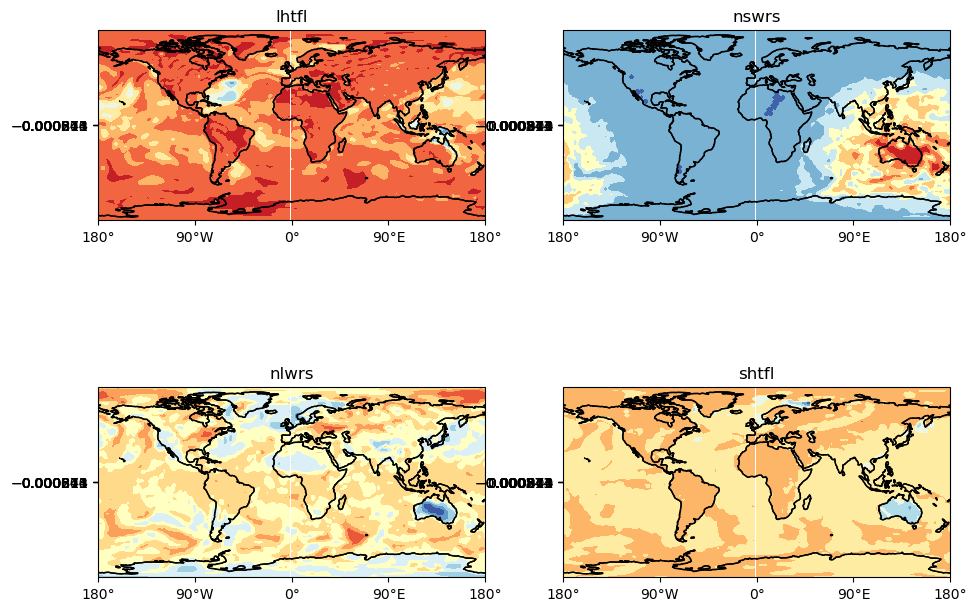

In [11]:
# Set some parameters for the map
nrows=2
ncols=2
itime = 0
myprojection = ccrs.AlbersEqualArea()
myprojection = ccrs.Mercator()
myprojection = ccrs.PlateCarree()

# Initialise the map with the projection above
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                        subplot_kw={'projection': myprojection},
                        figsize=(11,8.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array.
# This helps when plotting using a for-loop.
axs=axs.flatten()

# Loop through fluxes
for i in range(len(fpre)):
    # Select the flux to load
    data1 = flux_components[fpre[i]]
    map1 = data1[fpre[i]][itime,:,:]
    axs[i].contourf(data1.lon, data1.lat, map1, cmap='RdYlBu', transform=cartopy.crs.PlateCarree())
    axs[i].coastlines()               # plot some data on them
    axs[i].set_title(fpre[i])                        # label it
    axs[i].add_feature(cfeature.COASTLINE)

    # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,90), crs=cartopy.crs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.Mercator())

fig.savefig('fig3-cartopy-lastname.png')


### Fig 3. Using `pyGMT`

PyGMT is especially good for geophysical quantities (and geophysics).

However, the formatting language looks a little different than matplotlib.

```{seealso}
PyGMT tutorials: [https://www.pygmt.org/latest/tutorials/index.html](https://www.pygmt.org/latest/tutorials/index.html)
```

- Projections availble: [https://www.pygmt.org/dev/projections/index.html](https://www.pygmt.org/dev/projections/index.html)
- Colormaps available: [https://docs.generic-mapping-tools.org/6.5/reference/cpts.html](https://docs.generic-mapping-tools.org/6.5/reference/cpts.html)



grdimage [WARNING]: The step size of coordinate (Latitude [degrees_north]) in grid ../data/lhtfl.sfc.gauss.1979.nc is not constant.
grdimage [WARNING]: GMT will use a constant step size of -1.90413; the original ranges from -1.9048 to -1.8889.
grdimage [WARNING]: The y-coordinates and range attribute are in conflict; must rely on coordinates only
grdimage [WARNING]: Guessing of registration in conflict between x and y, using gridline
grdimage [WARNING]: The step size of coordinate (Latitude [degrees_north]) in grid ../data/nswrs.sfc.gauss.1979.nc is not constant.
grdimage [WARNING]: GMT will use a constant step size of -1.90413; the original ranges from -1.9048 to -1.8889.
grdimage [WARNING]: The y-coordinates and range attribute are in conflict; must rely on coordinates only
grdimage [WARNING]: Guessing of registration in conflict between x and y, using gridline
grdimage [WARNING]: The step size of coordinate (Latitude [degrees_north]) in grid ../data/nlwrs.sfc.gauss.1979.nc is not co

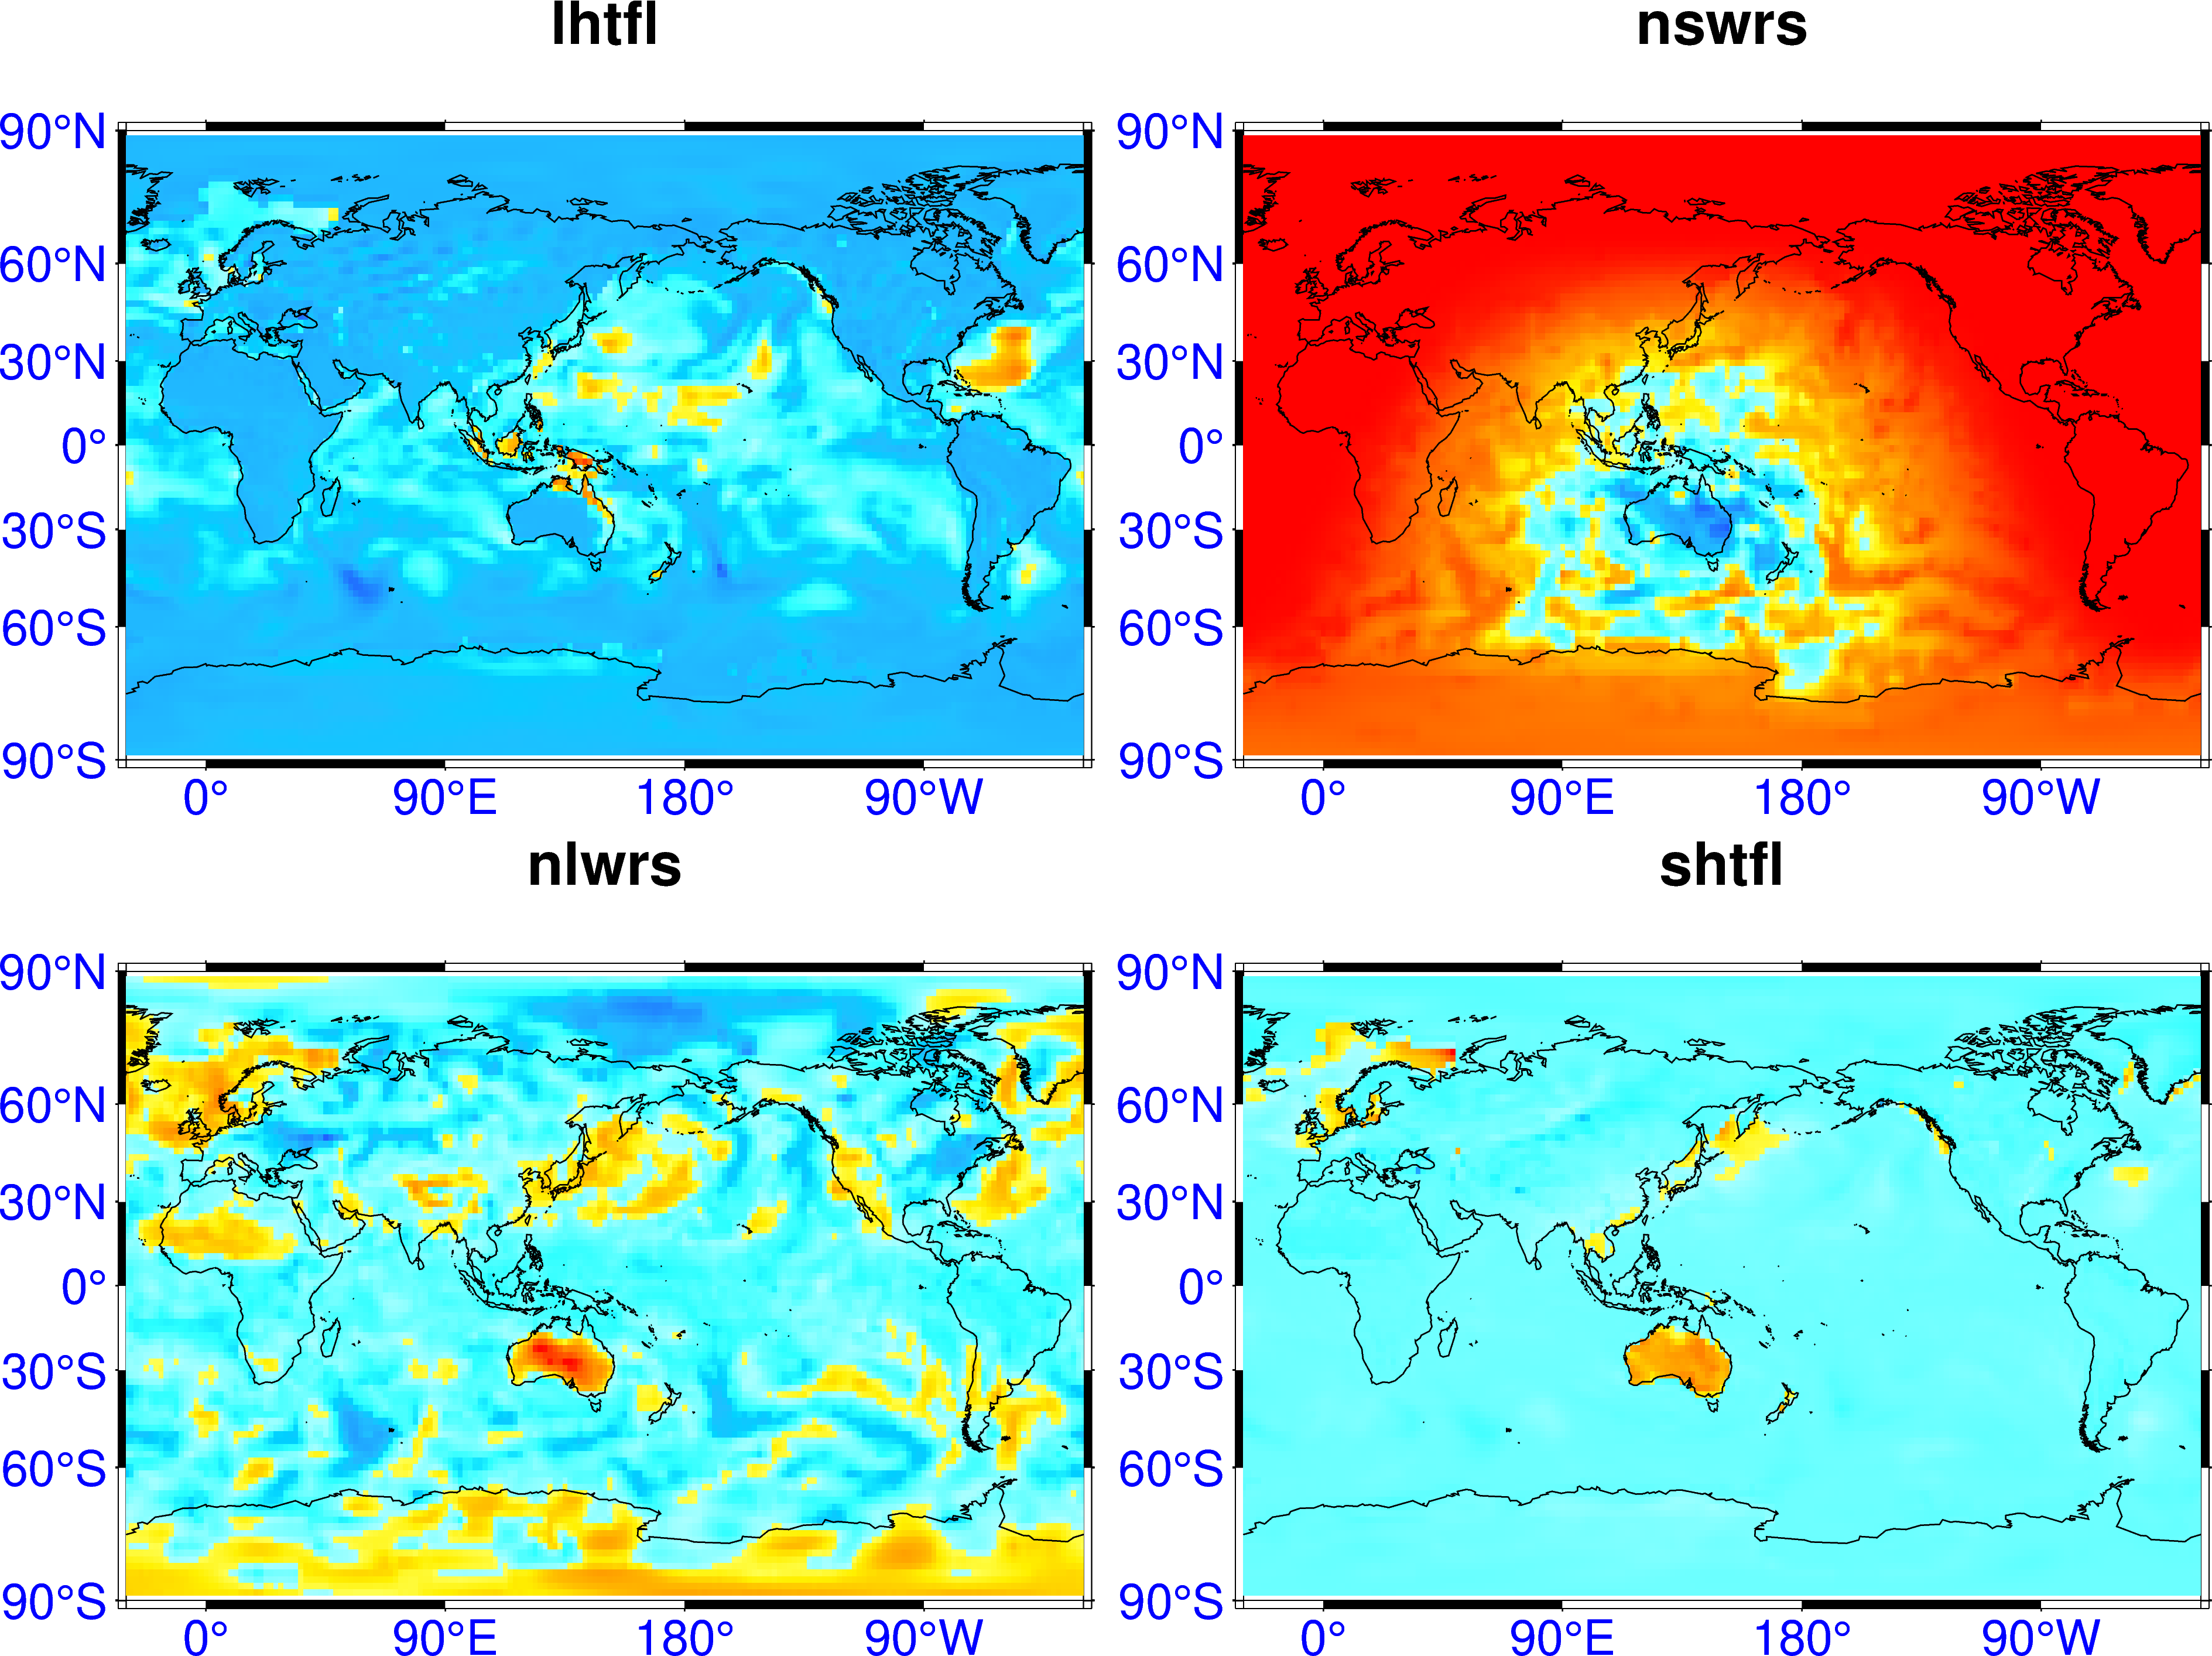

In [15]:

fig = pygmt.Figure()

with pygmt.config(FONT_ANNOT_PRIMARY="20p,Helvetica,blue", FONT_LABEL="15p,Helvetica,red"):
    with fig.subplot(nrows=2, ncols=2,  figsize=("30c", "22c"), sharex="b",sharey="l", margins="1c"):
        for i in range(len(fpre)):
            fname = filepath + fpre[i] + fpost
            grid = fname + '?' + fpre[i]

            
            with fig.set_panel(panel=i):  # sets the current panel
                fig.basemap(
                    region="g",
                    projection="Cyl_stere/150/-20/?",
                    frame=['WSne+t'+fpre[i], "xa90", "ya30"],
                )
                fig.grdimage(
                    grid=grid,
                    cmap='no_green',
                )
                fig.coast(shorelines="1/0.5p,black")
                #fig.colorbar(frame=['x+l' +fpre[i], "y+lW/m@+2@+"])

fig.show()
fig.savefig('pygmt_test.png')
